<a href="https://colab.research.google.com/github/lazeicoder/Spam-and-smishing-detection-/blob/master/MultinomialNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)


In [4]:
df = pd.read_csv("Dataset_10191.csv")


In [5]:
label_encoder = LabelEncoder()
df["label_enc"] = label_encoder.fit_transform(df["LABEL"])

label_mapping = dict(zip(
    label_encoder.classes_,
    label_encoder.transform(label_encoder.classes_)
))

print("Label Mapping:", label_mapping)


Label Mapping: {'ham': np.int64(0), 'smishing': np.int64(1), 'spam': np.int64(2)}


In [6]:
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=20000,
    stop_words="english"
)

X = tfidf.fit_transform(df["TEXT"])
y = df["label_enc"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [8]:
mnb_model = MultinomialNB(
    alpha=1.0  # Laplace smoothing
)


In [9]:
mnb_model.fit(X_train, y_train)


MultinomialNB()

In [10]:
y_pred = mnb_model.predict(X_test)
y_prob = mnb_model.predict_proba(X_test)


In [11]:
accuracy = accuracy_score(y_test, y_pred)

macro_roc_auc = roc_auc_score(
    y_test,
    y_prob,
    multi_class="ovr",
    average="macro"
)

print("Accuracy:", accuracy)
print("Macro ROC-AUC:", macro_roc_auc)

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_,
    digits=4
))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9597842079450711
Macro ROC-AUC: 0.9887018590691096

Classification Report:
              precision    recall  f1-score   support

         ham     0.9911    0.9794    0.9852       679
    smishing     0.9421    0.9574    0.9497       680
        spam     0.9468    0.9426    0.9447       680

    accuracy                         0.9598      2039
   macro avg     0.9600    0.9598    0.9599      2039
weighted avg     0.9600    0.9598    0.9599      2039


Confusion Matrix:
[[665   6   8]
 [  1 651  28]
 [  5  34 641]]


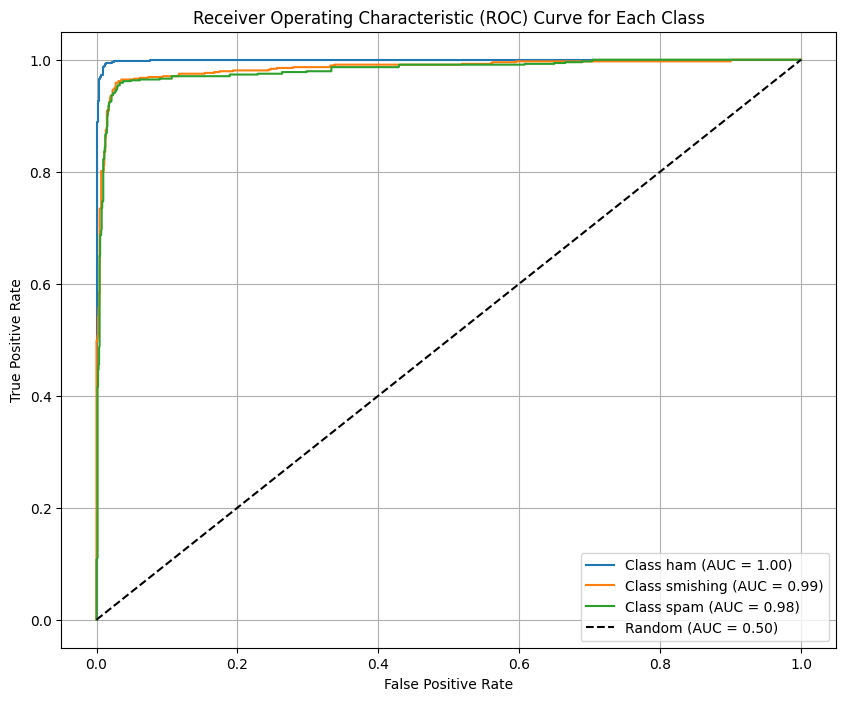

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the number of classes
n_classes = len(label_encoder.classes_)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    # Binarize the true labels for the current class
    y_test_binarized = (y_test == i).astype(int)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_binarized, y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

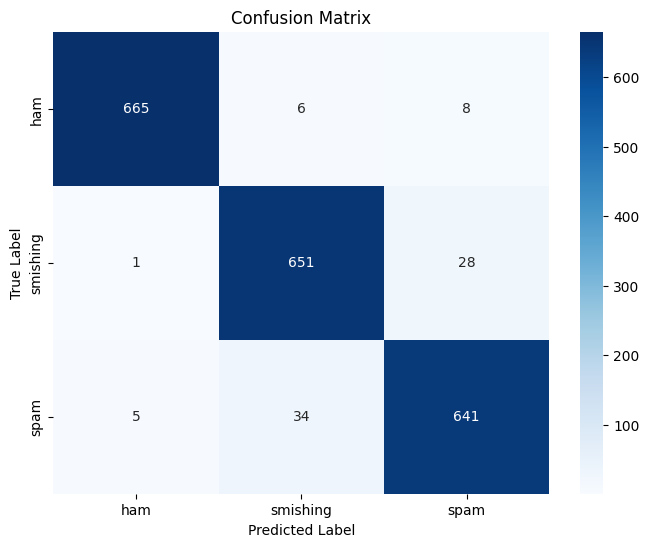

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class names from label_encoder
class_names = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()